# Rock, Paper, Scissors

### Import modules

In [128]:
import tensorflow as tf
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
import os
import random

### Set initial values

In [129]:
dir_images = "C:\\AT\\images"
path_model = "D:\\AT\\model\\handrecognition_model.h5"
image_size = (300,300)
input_shape = image_size + (1,)
validation_split = 0.15
the_seed = 1
seed = numpy.random.randint(the_seed)
phi = 360

random.seed(the_seed)
numpy.random.seed(the_seed)
tf.random.set_seed(the_seed)

### Data Preparation

#### Import local database as train and validation datasets

In [130]:
(train_ds, validation_ds) = tf.keras.utils.image_dataset_from_directory(
    directory=dir_images,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    image_size=image_size,
    seed=seed,
    validation_split=validation_split,
    subset='both',
    interpolation='bilinear',
    crop_to_aspect_ratio=False
)

Found 5113 files belonging to 3 classes.
Using 4347 files for training.
Using 766 files for validation.


#### Data Visualization

In [131]:
class_names = train_ds.class_names
class_names

['paper', 'rock', 'scissors']

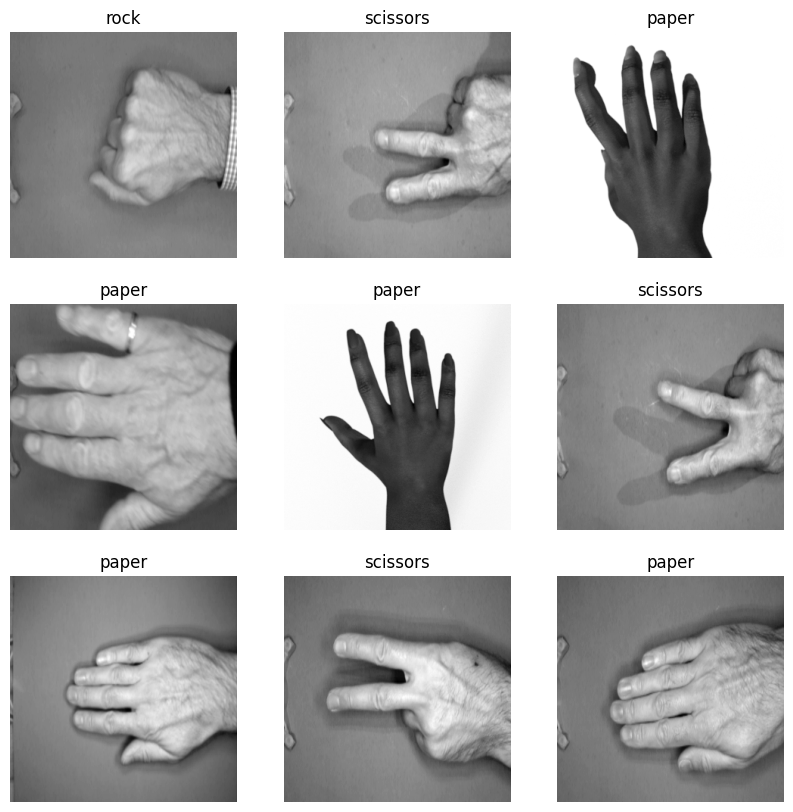

In [132]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

#### 

### Modeling

In [133]:
def create_rps(input_size : tuple[int, int, int] = (300, 300, 1),
                      convnn_acivation : str = 'relu',
                      fully_connected_acivation : str = 'tanh',
                      net_name : str = 'LittleEyes',
                      hyperparameter : int = 1,
                      phi=0):
    
    filter_size = (3,3)
    pooling_size = (3,3)
    
    # CAMADA OCULTA
    inputs = keras.Input(shape=input_size)
    
    scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    x = scale_layer(inputs)
    
    # # CAMADA DE AUMENTO DE DADOS
    # rotator = keras.layers.RandomRotation(phi)
    # x = rotator(inputs)

    # PRIMEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_1 = keras.layers.Conv2D(24, filter_size, activation = convnn_acivation)
    x = conv_2d_layer_1(inputs)

    # PRIMEIRA CAMADA MAX POOLING
    maxpool_1 = keras.layers.MaxPooling2D(pooling_size)
    x = maxpool_1(x)

    # SEGUNDA CAMADA CONVOLUCIONAL
    conv_2d_layer_2 = keras.layers.Conv2D(48, filter_size, activation = convnn_acivation)
    x = conv_2d_layer_2(x)
    

    # SEGUNDA CAMADA MAX POOLING
    maxpool_2 = keras.layers.MaxPooling2D(pooling_size)
    x = maxpool_2(x)

    # TERCEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_3 = keras.layers.Conv2D(64, filter_size, activation = convnn_acivation)
    x = conv_2d_layer_3(x)

    # TERCEIRA CAMADA MAX POOLING
    maxpool_3 = keras.layers.MaxPooling2D(pooling_size)
    x = maxpool_3(x)

    # FLATTEN
    flatten_layer = keras.layers.Flatten()
    x = flatten_layer(x)

    # FULLY CONNECTED HIDDEN LAYER
    hidden_layer = keras.layers.Dense(hyperparameter + 1, activation = fully_connected_acivation)
    x = hidden_layer(x)

    # OUTPUT LAYER
    output_layer = keras.layers.Dense(3)
    outputs = output_layer(x)

    return keras.Model(inputs = inputs, outputs = outputs, name = net_name)

In [134]:
# base_model = tf.keras.models.load_model(path_model)
# base_model.trainable = False
# inputs = tf.keras.Input(shape=input_shape)
# scale_layer = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
# x = scale_layer(inputs)
# outputs = base_model(x, training=False)

In [135]:
model = create_rps(input_size=input_shape, hyperparameter=1)
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=opt, metrics='accuracy', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(train_ds, epochs=5, 
                            validation_data=(validation_ds),
                            verbose=1,
                            batch_size=128)

Epoch 1/5
136/136 [==============================] - 116s 847ms/step - loss: 1.1212 - accuracy: 0.3382 - val_loss: 1.0999 - val_accuracy: 0.3355
Epoch 2/5
136/136 [==============================] - 115s 841ms/step - loss: 1.1002 - accuracy: 0.3352 - val_loss: 1.0984 - val_accuracy: 0.3355
Epoch 3/5
136/136 [==============================] - 118s 867ms/step - loss: 1.1001 - accuracy: 0.3347 - val_loss: 1.0990 - val_accuracy: 0.3355
Epoch 4/5
136/136 [==============================] - 136s 997ms/step - loss: 1.0999 - accuracy: 0.3340 - val_loss: 1.0997 - val_accuracy: 0.3172
Epoch 5/5
136/136 [==============================] - 114s 837ms/step - loss: 1.1012 - accuracy: 0.3333 - val_loss: 1.1008 - val_accuracy: 0.3172
